<a href="https://colab.research.google.com/github/Pavan-D45/MachineLearning/blob/main/Machine_learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **1.RANDOM FOREST**

In [3]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
# 1. Loading the Iris dataset
iris = load_iris()
x=iris.data
y=iris.target
# Splitting the dataset
tr_x, cv_x, tr_y, cv_y = train_test_split(x, y, test_size=0.30, random_state=42)
# 3. Choosing and training models
rf = RandomForestClassifier(random_state=42)
rf.fit(tr_x, tr_y)
# 4. Evaluating the models
accuracy_rf = rf.score(cv_x, cv_y)
print(f"Accuracy of Random Forest = {accuracy_rf * 100:.2f}%")
# 5. Predicting on test data (using part of the test split)
prd = rf.predict(cv_x)
# 6. Preparing output
output = pd.DataFrame({
 "Actual": cv_y,
 "Predicted": prd
}).reset_index(drop=True)
print(output.head())
# Save to CSV
output.to_csv("Iris_Predictions.csv", index=False)

Accuracy of Random Forest = 100.00%
   Actual  Predicted
0       1          1
1       0          0
2       2          2
3       1          1
4       1          1


# **2.LINEAR REGRESSION**

Mean Squared Error: 0.04
R-squared Score: 0.94


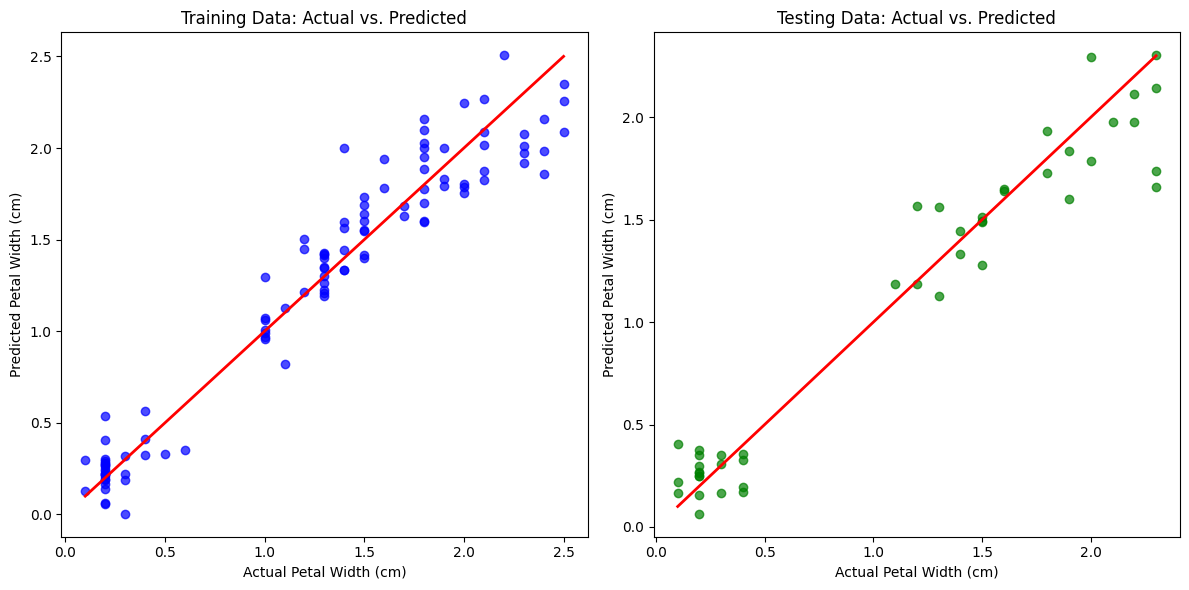

In [4]:
# Import necessary libraries
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
# Load the Iris dataset
iris = load_iris()
X = pd.DataFrame(iris.data, columns=iris.feature_names) # Features
y = X['petal width (cm)'] # Target: Petal Width
# Remove 'petal width (cm)' from the features to avoid leakage
X = X.drop(columns=['petal width (cm)'])
7
# Split the dataset into training and testing sets (70% train, 30% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,
random_state=42)
# Create and train the Linear Regression model
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)
# Make predictions on the training and testing sets
y_train_pred = linear_model.predict(X_train)
y_test_pred = linear_model.predict(X_test)
# Evaluate the model's performance on testing data
mse = mean_squared_error(y_test, y_test_pred)
r2 = r2_score(y_test, y_test_pred)
print(f"Mean Squared Error: {mse:.2f}")
print(f"R-squared Score: {r2:.2f}")
# Scatter plot: Actual vs. Predicted for Training Data
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.scatter(y_train, y_train_pred, color='blue', alpha=0.7)
plt.plot([y_train.min(), y_train.max()], [y_train.min(), y_train.max()],
color='red', linewidth=2)
plt.xlabel('Actual Petal Width (cm)')
plt.ylabel('Predicted Petal Width (cm)')
plt.title('Training Data: Actual vs. Predicted')
# Scatter plot: Actual vs. Predicted for Testing Data
plt.subplot(1, 2, 2)
plt.scatter(y_test, y_test_pred, color='green', alpha=0.7)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()],
color='red', linewidth=2)
plt.xlabel('Actual Petal Width (cm)')
plt.ylabel('Predicted Petal Width (cm)')
plt.title('Testing Data: Actual vs. Predicted')
# Display the plots
plt.tight_layout()
plt.show()

# **3.LOGISTIC REGRESSION**

In [6]:
# Import necessary libraries
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix,classification_report
# Load the digits dataset
digits = load_digits()
# Features (X) and Target (y)
X = digits.data # Each row is a flattened image (8x8 pixels)
y = digits.target # Target digit (0-9)
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,
random_state=42)
# Initialize and train the Logistic Regression model
model = LogisticRegression(max_iter=1000, solver='lbfgs', multi_class='auto')
model.fit(X_train, y_train)
# Predict on the test set
y_pred = model.predict(X_test)
# Evaluate the model
9
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy * 100:.2f}%")
# Confusion Matrix and Classification Report
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


Accuracy: 96.85%

Confusion Matrix:
[[53  0  0  0  0  0  0  0  0  0]
 [ 0 47  1  0  0  0  0  0  2  0]
 [ 0  0 47  0  0  0  0  0  0  0]
 [ 0  0  1 52  0  1  0  0  0  0]
 [ 0  1  0  0 58  0  1  0  0  0]
 [ 0  1  0  0  0 63  1  0  0  1]
 [ 0  0  0  0  0  1 52  0  0  0]
 [ 0  0  0  0  0  1  0 53  0  1]
 [ 0  0  0  0  0  1  0  0 42  0]
 [ 0  0  0  1  0  0  0  0  2 56]]

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        53
           1       0.96      0.94      0.95        50
           2       0.96      1.00      0.98        47
           3       0.98      0.96      0.97        54
           4       1.00      0.97      0.98        60
           5       0.94      0.95      0.95        66
           6       0.96      0.98      0.97        53
           7       1.00      0.96      0.98        55
           8       0.91      0.98      0.94        43
           9       0.97      0.95      0.96        59

    accuracy 

# **4.Implementation of one clustering algorithm**

In [7]:
# Import necessary libraries
from sklearn.datasets import load_digits
from sklearn.cluster import KMeans
from sklearn.metrics import accuracy_score, confusion_matrix
from scipy.stats import mode
import numpy as np
# Load the digits dataset
digits = load_digits()
X = digits.data # Feature vectors
y = digits.target # True labels
# Initialize the K-Means model with 10 clusters (one for each digit)
kmeans = KMeans(n_clusters=10, random_state=42)
kmeans.fit(X)
# Predict the cluster labels
cluster_labels = kmeans.labels_
# Map cluster labels to true labels
# Create a mapping between clusters and the most frequent true label in each cluster
label_mapping = np.zeros_like(cluster_labels)
for i in range(10):
 mask = (cluster_labels == i)
 label_mapping[mask] = mode(y[mask])[0]
# Calculate the accuracy
accuracy = accuracy_score(y, label_mapping)
print(f"K-Means Clustering Accuracy: {accuracy * 100:.2f}%")
# Confusion Matrix
print("\nConfusion Matrix:")
print(confusion_matrix(y, label_mapping))

K-Means Clustering Accuracy: 86.14%

Confusion Matrix:
[[176   0   0   0   2   0   0   0   0   0]
 [  0 130  23   1   0   1   2   0   3  22]
 [  1   6 146  12   0   0   0   2   9   1]
 [  0   0   1 159   0   2   0   7   6   8]
 [  0  13   0   0 159   0   0   5   4   0]
 [  0   0   0   0   2 137   2   0   0  41]
 [  1   3   0   0   0   0 176   0   1   0]
 [  0   0   0   0   0   0   0 169  10   0]
 [  0  14   3   0   0   2   1   2 136  16]
 [  0   1   0   1   3   4   0   8   3 160]]


# **5.SVM with logistic regression**

In [8]:
# Import necessary libraries
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
# Load the digits dataset
digits = load_digits()
# Features (X) and Target (y)
X = digits.data
y = digits.target
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
# Logistic Regression Model
logistic_model = LogisticRegression(max_iter=1000, solver='lbfgs', multi_class='auto')
logistic_model.fit(X_train, y_train)
y_pred_logistic = logistic_model.predict(X_test)
# SVM Model (with RBF kernel)
svm_model = SVC(kernel='rbf', gamma='scale', C=1.0)
svm_model.fit(X_train, y_train)
y_pred_svm = svm_model.predict(X_test)
# Calculate accuracies
logistic_accuracy = accuracy_score(y_test, y_pred_logistic)
svm_accuracy = accuracy_score(y_test, y_pred_svm)
# Print results
print(f"Logistic Regression Accuracy: {logistic_accuracy * 100:.2f}%")
print(f"SVM Accuracy: {svm_accuracy * 100:.2f}%")
# Confusion Matrix and Classification Report for SVM
print("\nConfusion Matrix (SVM):")
print(confusion_matrix(y_test, y_pred_svm))
print("\nClassification Report (SVM):")
print(classification_report(y_test, y_pred_svm))

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


Logistic Regression Accuracy: 96.85%
SVM Accuracy: 98.70%

Confusion Matrix (SVM):
[[53  0  0  0  0  0  0  0  0  0]
 [ 0 50  0  0  0  0  0  0  0  0]
 [ 0  0 47  0  0  0  0  0  0  0]
 [ 0  0  0 53  0  0  0  0  1  0]
 [ 0  0  0  0 60  0  0  0  0  0]
 [ 0  0  0  0  0 65  1  0  0  0]
 [ 0  0  0  0  0  0 53  0  0  0]
 [ 0  0  0  0  0  0  0 54  0  1]
 [ 0  0  0  0  0  0  0  0 42  1]
 [ 0  0  0  1  0  0  0  1  1 56]]

Classification Report (SVM):
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        53
           1       1.00      1.00      1.00        50
           2       1.00      1.00      1.00        47
           3       0.98      0.98      0.98        54
           4       1.00      1.00      1.00        60
           5       1.00      0.98      0.99        66
           6       0.98      1.00      0.99        53
           7       0.98      0.98      0.98        55
           8       0.95      0.98      0.97        43
           9   

# **6.SVM Multiclass classification**

In [9]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score
# 1. Loading the Iris dataset
iris = load_iris()
data = pd.DataFrame(data=iris.data, columns=iris.feature_names)
data['target'] = iris.target
# 2. Data preprocessing
# Feature matrix (X) and target vector (y)
X = data[iris.feature_names]
y = data['target']
# Splitting the dataset
tr_x, cv_x, tr_y, cv_y = train_test_split(X, y, test_size=0.30, random_state=42)
# 3. Choosing and training the SVM model
svm_model = SVC(kernel='linear', random_state=42)
svm_model.fit(tr_x, tr_y)
# 4. Predicting on the test set
predictions = svm_model.predict(cv_x)
# 5. Evaluating the model
accuracy = accuracy_score(cv_y, predictions)
print(f"Accuracy of SVM = {accuracy * 100:.2f}%\n")
print("Classification Report:")
print(classification_report(cv_y, predictions, target_names=iris.target_names))
# 6. Output predictions
output = pd.DataFrame({
 "Actual": cv_y,
 "Predicted": predictions
}).reset_index(drop=True)
print(output.head())
# Save predictions to CSV
output.to_csv("Iris_SVM_Predictions.csv", index=False)


Accuracy of SVM = 100.00%

Classification Report:
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        19
  versicolor       1.00      1.00      1.00        13
   virginica       1.00      1.00      1.00        13

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45

   Actual  Predicted
0       1          1
1       0          0
2       2          2
3       1          1
4       1          1


#  7.Naïve Bayesian Classifier model



In [10]:
from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, classification_report
# Load Wine dataset
data = load_wine()
X = data.data # Features
y = data.target # Target variable (wine class)
# Convert the problem to binary classification: Class 0 (Yes = 1) vs Others (No = 0)
y_binary = (y == 0).astype(int) # Class 0 vs others
# Split dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y_binary, test_size=0.2, random_state=42)
# Initialize Gaussian Naive Bayes classifier
gnb = GaussianNB()
# Train the model
gnb.fit(X_train, y_train)
# Predict on the test set
y_pred = gnb.predict(X_test)
# Evaluate the model's performance
print(f"Accuracy: {accuracy_score(y_test, y_pred)}")
print("\nClassification Report:\n", classification_report(y_test, y_pred))
# Predict on a new data point (example wine features)
new_data = [[13.0, 2.0, 2.5, 15.0, 100.0, 2.8, 2.1, 0.3, 1.8, 6.0, 1.0, 3.0, 750]]
# Predict if it's Class 0 (Yes = 1) or not (No = 0)
prediction = gnb.predict(new_data)
# Output prediction
if prediction[0] == 1:
 print("Prediction: Yes (Class 0 Wine)")
else:
 print("Prediction: No (Not Class 0 Wine)")

Accuracy: 0.9722222222222222

Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.95      0.98        22
           1       0.93      1.00      0.97        14

    accuracy                           0.97        36
   macro avg       0.97      0.98      0.97        36
weighted avg       0.97      0.97      0.97        36

Prediction: Yes (Class 0 Wine)
